# Árvores de decisão I  (Machine learning)

## Sumário <a name='Contents'></a>
1. [Introdução a árvores de decisão](#IntroAD)
2. [Carregando e tratando dados](#caTD)
    1. [Dados duplicados](#dadosDup)
    2. [Identificando e tratando dados ausentes](#IdenTratAusen)
    3. [Dados categorizados](#DadosCat)
3. [Separando as variáveis explicativas e `target`](#SepVarExp)
4. [Melhor valor e variável para quebra](#MelhorValVar)
    1. [Árvore de classificação com uma variável flag](#ArClassifFlag)
5. [Quebra de variável contínua](#QuebraVarCont)
6. [Overfitting](#Overfitting)
    1. [Exemplo de Overfitting](#ExOverfitting)
7. [Overfitting, treino e teste](#overfittingTT)
    1. [Separando entre treino e teste](#SepTrainTest)
8. [Poda da árvore I](#Poda1)
    1. [Limitando a profundidade](#LimitProf)
    2. [Limitando a quantidade de amostras na folha](#LimitFolha)
    3. [Limitando a profundidade e a quantidade de amostras na folha](#LimitProfFolha)
9. [Poda da árvore II](#PodaII)

## 1 - Introdução a árvores de decisão <a nome='IntroAD'><a/>

- **Inteligência artificial (IA)** refere-se a simulações da inteligência humana realizada por máquinas programadas para imitar comportamentos e ações humanos.
- **Aprendizado de máquina (Machine learning)**, um conceito interno à IA, refere-se ao conceito/capacidade de programas de computador que podem aprender automaticamente e adaptar-se a novos dados (predição baseada no histórico de dados).
- **Modelos de machine learning**:
- **Modelo supervisionado**: *"Aprendizagem supervisionada, também conhecida como aprendizado de máquina supervisionado, é uma subcategoria de aprendizado de máquina e inteligência artificial. É definido pelo uso de conjuntos de dados rotulados (target) para treinar algoritmos que classificam dados ou preveem resultados com precisão"*. [IBM](https://www.ibm.com/br-pt/topics/supervised-learning)
- **Modelo não supervisionado**: *"Aprendizado não supervisionado, também conhecido como machine learning não supervisionado, usa algoritmos de machine learning para analisar e agrupar conjuntos de dados não rotulados. Esses algoritmos descobrem padrões ocultos ou agrupamentos de dados sem a necessidade de intervenção humana. Sua capacidade de descobrir semelhanças e diferenças nas informações o torna a solução ideal para análise exploratória de dados, estratégias de vendas cruzadas, segmentação de clientes e reconhecimento de imagem"*. [IBM](https://www.ibm.com/br-pt/topics/unsupervised-learning)

**Modelo supervisionado**:
- *Classificação*: são problemas envolvendo variáveis resposta (target) discretas. Ex: Classificar um cliente como bom ou não, classificar a qualidade de um objeto, etc.
- Regressão: Algoritmos de regressão são implementados quando a variável resposta (target) é uma variável numérica contínua. Ex: Previsão de venda, previsão de temperatura, preço etc.

**Árvore de decisão (DT - Decision tree)** são métodos de aprendizado não-paramétrico usados para **classificação** e **regressão**. A ideia é criar um modelo capaz de prever o valor de determinada variável alvo (target), aprendendo regras de decisão inferidas a partir de dados. *A tree can be seen as a piecewise constant approximation*. [scikit-learn](https://scikit-learn.org/stable/modules/tree.html) 

## 2 - Carregando e tratando dados <a name='caTD'><a/>

Dataset --> Titanic fornecido pelo próprio `Seaborn`.

In [7]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Carregando o DataFrame (contido no Seaborn)

titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### 2.1 - Dados duplicados <a name='dadosDup'><a/>

In [13]:
# Removendo dados duplicados
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
# Quantidade de dados inicial
print(titanic.shape)

# Quantidade após a remoção dos dados duplicados
titanic = titanic.drop_duplicates()
print(titanic.shape)

(891, 15)
(784, 15)


In [15]:
# Últimas linhas
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [16]:
# Mesmo tendo 784 linhas ele mostra o índice até 890
# Fezendo um reset_index()

titanic.reset_index(drop=True, inplace=True)

In [17]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
783,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


### 2.2 - Identificando e tratando dados ausentes <a name='IdenTratAusen'><a/>

A árvore de decisão requer pouco tratamento de dados. Outras técnicas geralmente requerem normalização de dados, variáveis fictícias precisam ser criadas e valores em branco precisam ser removidos. No entanto, o módulo do `scikit-learn` de árvore de decisões *não oferece suporte a valores ausentes*. [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#id2)

In [19]:
# Avaliando dados ausentes
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
percentagem = (titanic.isnull().sum() / len(titanic)) * 100
percentagem

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [21]:
# Removendo todas as colunas que tenham pelo menos um na

titanic_sem_na = titanic.dropna(axis = 1)

In [22]:
titanic_sem_na.shape

(784, 11)

In [23]:
titanic_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


### 2.3 - Dados categorizados <a name='DadosCat'><a/>

CART (árvores de classificação e regressão) é muito semelhante a C4.5, mas difere porque oferece suporte a variáveis ​​de destino numéricas (regressão) e não calcula conjuntos de regras. A CART constrói árvores binárias usando o recurso e o limite que geram o maior ganho de informação em cada nó.

O scikit-learn usa uma versão otimizada do algoritmo CART; entretanto, a **implementação do scikit-learn não suporta variáveis categorizadas** por enquanto.

[Scikit-learn](https://scikit-learn.org/stable/modules/tree.html#id2)

Como não há suporte para dados faltantes (missing) e para variáveis categorizadas. Será necessário converter variáveis categorizadas para variáveis dummy. Uma vez que os dados missing já foram abordados.

In [25]:
titanic_sem_na.head(2)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False


Descrição das colunas: 

- **survived** - se o passageiro sobreviveu ou não, ou seja, nossa target
- **pclass** - classe em que o passageiro estava (primeira, segunda, terceira)
- **sex** - genero do passageiro (masculino ou feminino)
- **sibsp** - quantidade de irmãos/esposos/esposas no navio (0 a 8)	
- **parch** - quantidade de pais/filhos a bordo
- **fare** - preço do ticket
- **class** - igual a pclass	
- **who** - se é homem, mulher ou criança
- **adult_male** - se é um homem adulto
- **alive** - igual a survived
- **alone** - se estava sozinho a bordo


#### 2.3.1 - `survived` e `alive`

In [28]:
print(titanic_sem_na.survived.value_counts())

titanic_sem_na.survived.value_counts(normalize=True)

# Devido a normalização a soma dos valores resulta em 1

survived
0    461
1    323
Name: count, dtype: int64


survived
0    0.58801
1    0.41199
Name: proportion, dtype: float64

In [29]:
print(titanic_sem_na.alive.value_counts())
titanic_sem_na.alive.value_counts(normalize=True)

alive
no     461
yes    323
Name: count, dtype: int64


alive
no     0.58801
yes    0.41199
Name: proportion, dtype: float64

In [30]:
# Verificando a coerência dos dois grupos
titanic_sem_na[['alive', 'survived', 'sibsp']].groupby(['alive', 'survived']).count()

,,sibsp
alive,survived,
no,0,461
yes,1,323


In [31]:
# Como as variáveis apresentam a mesma informação

titanic_sem_na = titanic_sem_na.drop('alive', axis=1)
titanic_sem_na

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,male,1,0,7.2500,Third,man,True,False
1,1,1,female,1,0,71.2833,First,woman,False,False
2,1,3,female,0,0,7.9250,Third,woman,False,True
3,1,1,female,1,0,53.1000,First,woman,False,False
4,0,3,male,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,0,5,29.1250,Third,woman,False,False
780,1,1,female,0,0,30.0000,First,woman,False,True
781,0,3,female,1,2,23.4500,Third,woman,False,False
782,1,1,male,0,0,30.0000,First,man,True,True


#### 2.3.2 - `pclass` e `class`

Também representam as mesmas variáveis.

In [33]:
titanic_sem_na['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [34]:
titanic_sem_na['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [35]:
titanic_sem_na[['pclass', 'class', 'sibsp']].groupby(['pclass', 'class'], observed=False).count()

sibsp
pclass class        
1      First     214
       Second      0
       Third       0
2      First       0
       Second    165
       Third       0
3      First       0
       Second      0
       Third     405

In [36]:
# Removendo uma das variáveis
titanic_sem_na = titanic_sem_na.drop('pclass', axis=1)
titanic_sem_na.shape

(784, 9)

#### 2.3.3 - Demais variáveis

In [38]:
titanic_sem_na.sex.unique()

array(['male', 'female'], dtype=object)

In [39]:
titanic_sem_na.sibsp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [40]:
titanic_sem_na.parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [41]:
titanic_sem_na.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [42]:
# Criando uma tabela para verificar alguns dados
print(titanic_sem_na['sibsp'].count())
titanic_sem_na[['sex', 'who', 'sibsp']].groupby(['sex', 'who']).count()

784


sibsp
sex    who         
female child     42
       woman    251
male   child     40
       man      451

In [43]:
titanic_sem_na.head()

,survived,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,male,1,0,7.2500,Third,man,True,False
1,1,female,1,0,71.2833,First,woman,False,False
2,1,female,0,0,7.9250,Third,woman,False,True
3,1,female,1,0,53.1000,First,woman,False,False
4,0,male,0,0,8.0500,Third,man,True,True


#### 2.3.4 - Transformando variáveis categóricas em dummies (flag)

In [45]:
titanic_encoded = pd.get_dummies(titanic_sem_na, columns=['class', 'who'], drop_first=True)
titanic_encoded.head()

# drop_first --> Whether to get k-1 dummies out of k 
# categorical levels by removing the first level.

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,male,1,0,7.2500,True,False,False,True,True,False
1,1,female,1,0,71.2833,False,False,False,False,False,True
2,1,female,0,0,7.9250,False,True,False,True,False,True
3,1,female,1,0,53.1000,False,False,False,False,False,True
4,0,male,0,0,8.0500,True,True,False,True,True,False


####  2.3.5 - Mapping para a variável `sex`

In [47]:
titanic_encoded.sex.unique()

array(['male', 'female'], dtype=object)

In [48]:
# Mapeando a variável
titanic_encoded.sex = titanic_encoded.sex.map({'female': 1, 'male':0})

In [49]:
# Variável mapeada
titanic_encoded.sex.unique()

array([0, 1], dtype=int64)

In [50]:
titanic_encoded.head(2)

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,0,1,0,7.2500,True,False,False,True,True,False
1,1,1,1,0,71.2833,False,False,False,False,False,True


In [51]:
titanic_encoded.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male         bool
alone              bool
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

#### 2.3.6 - Mudando os tipos das variáveis `adult_male` and `alone`

In [53]:
titanic_encoded.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male         bool
alone              bool
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [54]:
# Colocando a variável como int
titanic_encoded.adult_male.astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
779    0
780    0
781    0
782    1
783    1
Name: adult_male, Length: 784, dtype: int32

In [55]:
# Definindo ambas as variáveis como "int"
titanic_encoded.adult_male = titanic_encoded.adult_male.astype(int)
titanic_encoded.alone = titanic_encoded.alone.astype(int)

In [56]:
titanic_encoded.dtypes

survived          int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male        int32
alone             int32
class_Second       bool
class_Third        bool
who_man            bool
who_woman          bool
dtype: object

In [57]:
titanic_encoded.columns

Index(['survived', 'sex', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'class_Second', 'class_Third', 'who_man', 'who_woman'],
      dtype='object')

In [58]:
titanic_encoded.head()

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,0,1,0,7.2500,1,0,False,True,True,False
1,1,1,1,0,71.2833,0,0,False,False,False,True
2,1,1,0,0,7.9250,0,1,False,True,False,True
3,1,1,1,0,53.1000,0,0,False,False,False,True
4,0,0,0,0,8.0500,1,1,False,True,True,False


## 3 - Separando as variáveis explicativas e `target` <a name='SepVarExp'><a/>

In [60]:
# Variável target
y = titanic_encoded.survived

In [61]:
y

0      0
1      1
2      1
3      1
4      0
      ..
779    0
780    1
781    0
782    1
783    0
Name: survived, Length: 784, dtype: int64

In [62]:
x = titanic_encoded.drop('survived', axis=1)

In [63]:
x.head()

,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,1,0,7.2500,1,0,False,True,True,False
1,1,1,0,71.2833,0,0,False,False,False,True
2,1,0,0,7.9250,0,1,False,True,False,True
3,1,1,0,53.1000,0,0,False,False,False,True
4,0,0,0,8.0500,1,1,False,True,True,False


Agora o conjunto de dados foi dividido em dois, sendo um deles o `target` (y) e o outro é composto pelas *variáveis explicativas* (x).

## 4 - Melhor valor e variável para quebra <a name='MelhorValVar'><a/>

In [66]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier

### 4.1 - Árvore de classificação com uma variável flag <a name='ArClassifFlag'><a/>

In [68]:
# Classificador (classifier)
# Criando o objeto "árvore"

clf = DecisionTreeClassifier(random_state=100)
# random_state - Para obter um comportamento determinístico durante o ajuste

clf

DecisionTreeClassifier(random_state=100)

In [69]:
x.head()

,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,1,0,7.2500,1,0,False,True,True,False
1,1,1,0,71.2833,0,0,False,False,False,True
2,1,0,0,7.9250,0,1,False,True,False,True
3,1,1,0,53.1000,0,0,False,False,False,True
4,0,0,0,8.0500,1,1,False,True,True,False


In [70]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

#### 4.1.1 - Árvore de classificação `adult_male`

Fazendo uso de uma variável.

In [72]:
x[['adult_male']].head()

,adult_male
0,1
1,0
2,0
3,0
4,1


Os valores de x serão utilizados como dados para o treinamento do modelo, da árvore, e os valores de y serão a variável alvo (target)...

In [74]:
# Criando a árvore de decisão
clf = clf.fit(x[['adult_male']], y)
clf

DecisionTreeClassifier(random_state=100)

In [75]:
# Verificando os valore de indivíduos
print(titanic_encoded.survived.value_counts())
titanic_encoded.adult_male.value_counts()

survived
0    461
1    323
Name: count, dtype: int64


adult_male
1    451
0    333
Name: count, dtype: int64

[Text(0.5, 0.75, 'adult_male <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 451\nvalue = [366, 85]\nclass = Died')]

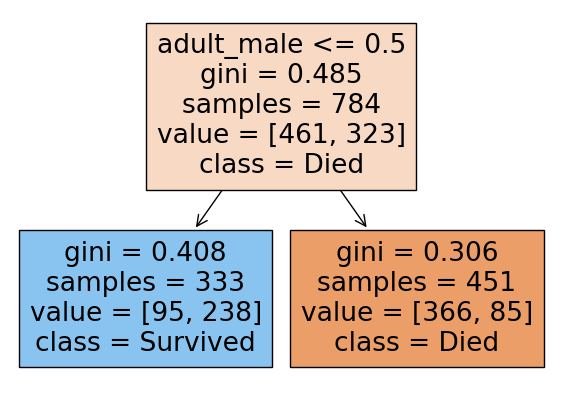

In [76]:
# Plotando a árvore de decisão
plt.figure(figsize=(7,5))
plot_tree(
    clf,
    filled=True,
    class_names=['Died', 'Survived'],
    feature_names=['adult_male']
)

y = "survived" --> Target - Tem seus valore apresentados pelo `sample` (a soma) e `value` da raiz (primeira caixa)

x = "adult_male" --> dados para treinamento - Tem seus dados apresentados nos `samples` e `value` das folhas (caixas ramificadas)

##### **Fórmula para cálculo do Gini**

- **gini** representa/chama-se impureza do "nó". É o critério de quebra entre os nós.
- Na documentação está: *criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulatio*n`.

  
$$ Gini =  1 - (probabilidade Sim)^{2} - (probabilidade Não)^{2} $$

$$ Gini =  1 - (qtd Sim / total)^{2} - (qtd Não/ total)^{2} $$

##### **Gini da raiz**

$$ Gini_{raiz} = 1 - \left(\frac{323}{461+323}\right)^{2} - \left(\frac{461}{461+323}\right)^{2} $$

In [80]:
print('Gini da raiz é: ', 1 - (323/(461+323))**2 - (461/(461+323))**2)

Gini da raiz é:  0.48450840795501876


##### **Gini da folha a esquerda**

$$ Gini_{folhaesquerda} = 1 - \left(\frac{238}{95+238}\right)^{2} - \left(\frac{95}{95+238}\right)^{2} $$

In [82]:
print('Gini da folha esquerda é: ', 1 - (238/(95+238))**2 - (95/(95+238))**2)

Gini da folha esquerda é:  0.40779518256995734


##### **Gini da folha a direita**

$$ Gini_{folhadireita} = 1 - \left(\frac{85}{366+85}\right)^{2} - \left(\frac{366}{366+85}\right)^{2} $$

In [84]:
print('Gini da folha direita é: ', 1 - (85/(366+85))**2 - (366/(366+85))**2)

Gini da folha direita é:  0.30589820109045673


> Quando menor o valor de Gini mais puro é o "nó" (a folha, neste caso)

#### 4.1.2 - Árvore de classificação com a variável "class_Third"

In [87]:
clf = clf.fit(x[['class_Third']], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.75, 'class_Third <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.25, 0.25, 'gini = 0.488\nsamples = 379\nvalue = [160.0, 219.0]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.382\nsamples = 405\nvalue = [301.0, 104.0]\nclass = Died')]

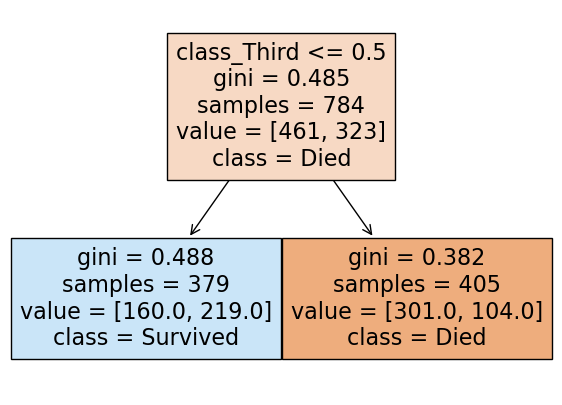

In [88]:
plt.figure(figsize=(7, 5))
plot_tree(
    clf,
    filled=True, 
    class_names=['Died', 'Survived'],
    feature_names=['class_Third']
)

Sendo o passageiro de terceira classe há uma maior probabilidade de morte.

In [90]:
titanic_encoded.survived.value_counts(), titanic_encoded.class_Third.value_counts()

(survived
 0    461
 1    323
 Name: count, dtype: int64,
 class_Third
 True     405
 False    379
 Name: count, dtype: int64)

#### 4.1.3 - Árvore de classificação com duas variáveis "flag"

- 'adult_male' e 'class_Third'.

In [92]:
clf = clf.fit(x[['adult_male', 'class_Third']], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.8333333333333334, 'adult_male <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.25, 0.5, 'class_Third <= 0.5\ngini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.125, 0.16666666666666666, 'gini = 0.096\nsamples = 178\nvalue = [9, 169]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.494\nsamples = 155\nvalue = [86, 69]\nclass = Died'),
 Text(0.75, 0.5, 'class_Third <= 0.5\ngini = 0.306\nsamples = 451\nvalue = [366, 85]\nclass = Died'),
 Text(0.625, 0.16666666666666666, 'gini = 0.374\nsamples = 201\nvalue = [151, 50]\nclass = Died'),
 Text(0.875, 0.16666666666666666, 'gini = 0.241\nsamples = 250\nvalue = [215, 35]\nclass = Died')]

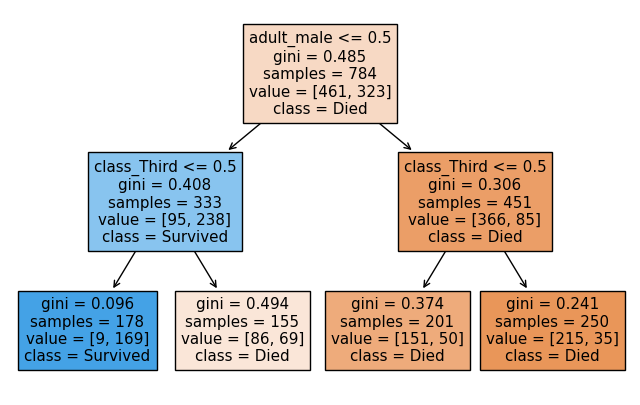

In [93]:
plt.figure(figsize=(8,5))
plot_tree(
    clf,
    filled=True,
    class_names=['Died', 'Survived'],
    feature_names=['adult_male', 'class_Third']
)

## 5 - Quebra de variável contínua <a name='QuebraVarCont'><a/>

- A quebra pode ser definida partindo-se de uma média dos valores.

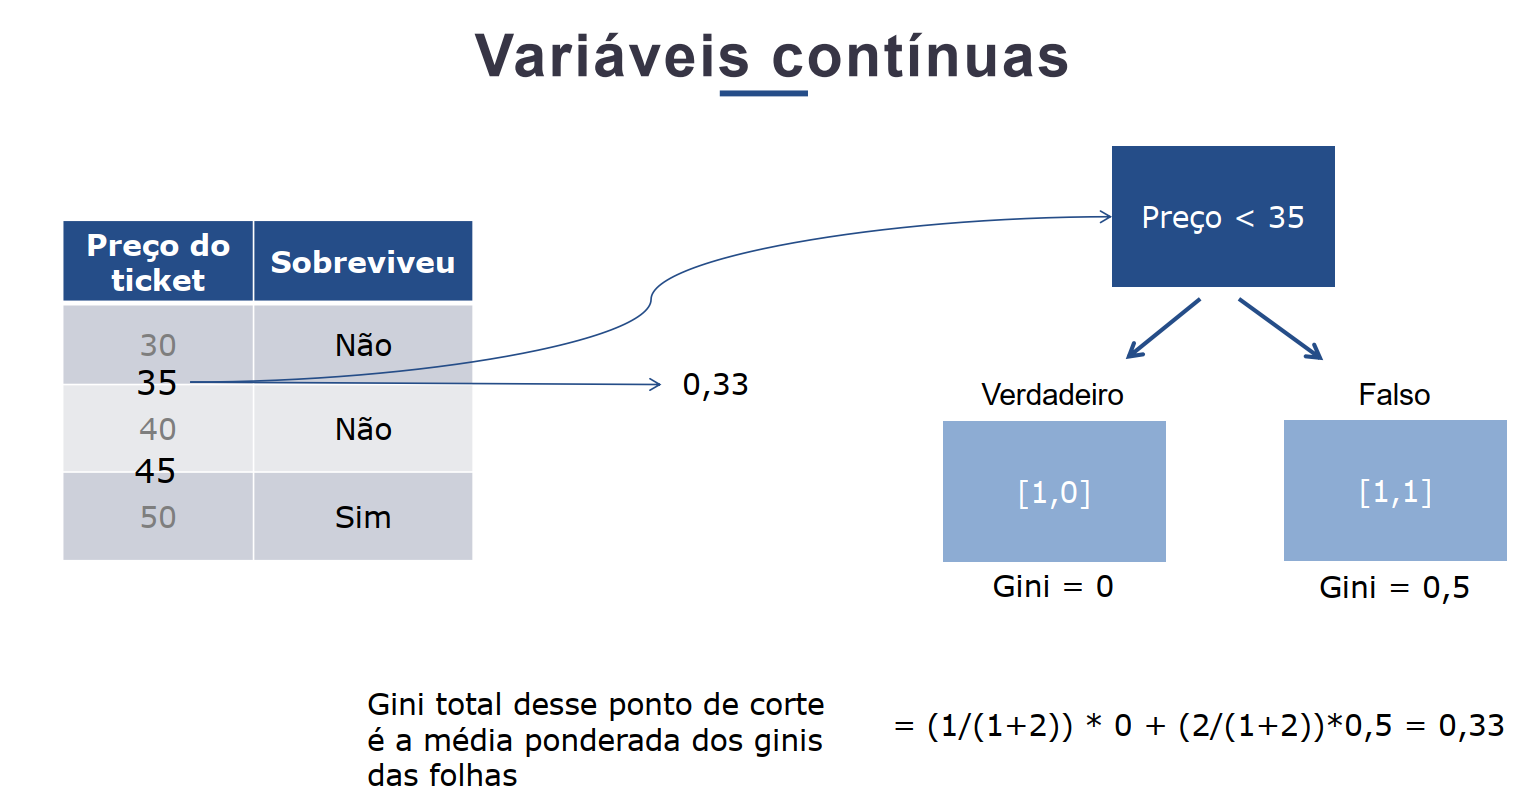
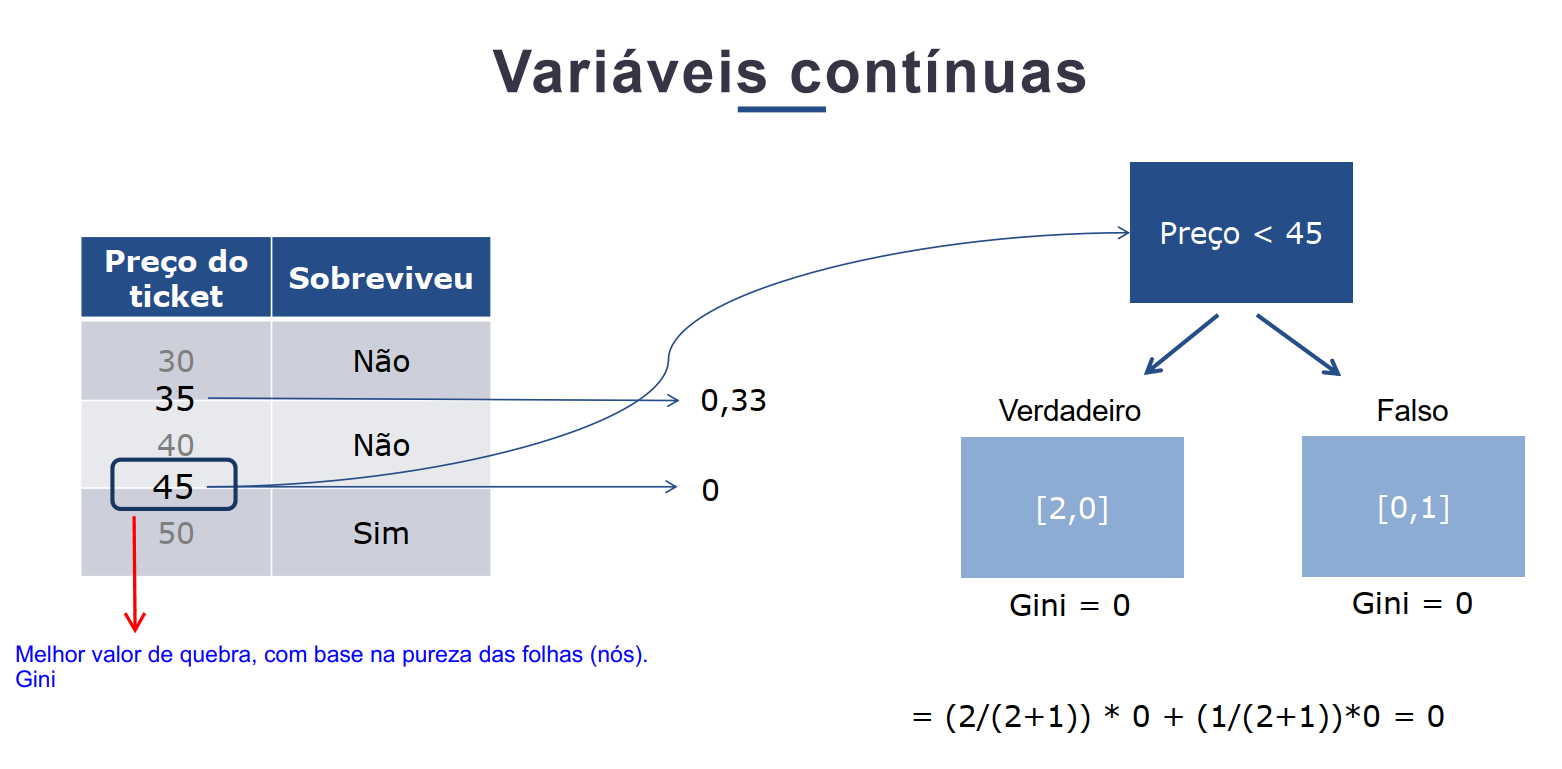



## 6 - Overfitting <a name='Overfitting'><a/>

- Modelo muito bem ajustado a dados históricos mas falha ao fazer previsão de novos resultados.
  
Sobre-ajuste ou sobreajuste -`overfitting`- é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

##### Treino e teste

O conjunto de dados pode ser separado nas proporções equivalentes a 70% dos dados para treino e 30% para teste.
- O conjunto de teste é utilizado para avaliar a performance do modelo (machine learning).

### 6.1 - Exemplo de Overfitting <a name='ExOverfitting'><a/>

Árvore de decisão para exemplo do overfitting.

In [99]:
# Importando bibliotecas de interesse

import pandas as pd
import numpy as np

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [100]:
# Montando o dataset
x1 = np.array([10,22,13,42,25,36,24])
x2 = np.array([100,200,300,400,500,600,400])
T = np.array([0,0,0,1,0,1,1])

teste = pd.DataFrame({'x1':x1, 'x2': x2})
teste

,x1,x2
0,10,100
1,22,200
2,13,300
3,42,400
4,25,500
5,36,600
6,24,400


In [101]:
# Definindo a árvore de classificação 
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [102]:
# Aplicando ao dataframe
clf = clf.fit(teste[['x1', 'x2']], T)
# ou
# clf = clf.fit(teste, y)

clf

DecisionTreeClassifier(random_state=100)

[Text(0.3333333333333333, 0.875, 'x1 <= 23.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = não'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = não'),
 Text(0.5, 0.625, 'x2 <= 450.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = sim'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = sim'),
 Text(0.6666666666666666, 0.375, 'x1 <= 30.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = não'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = não'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = sim')]

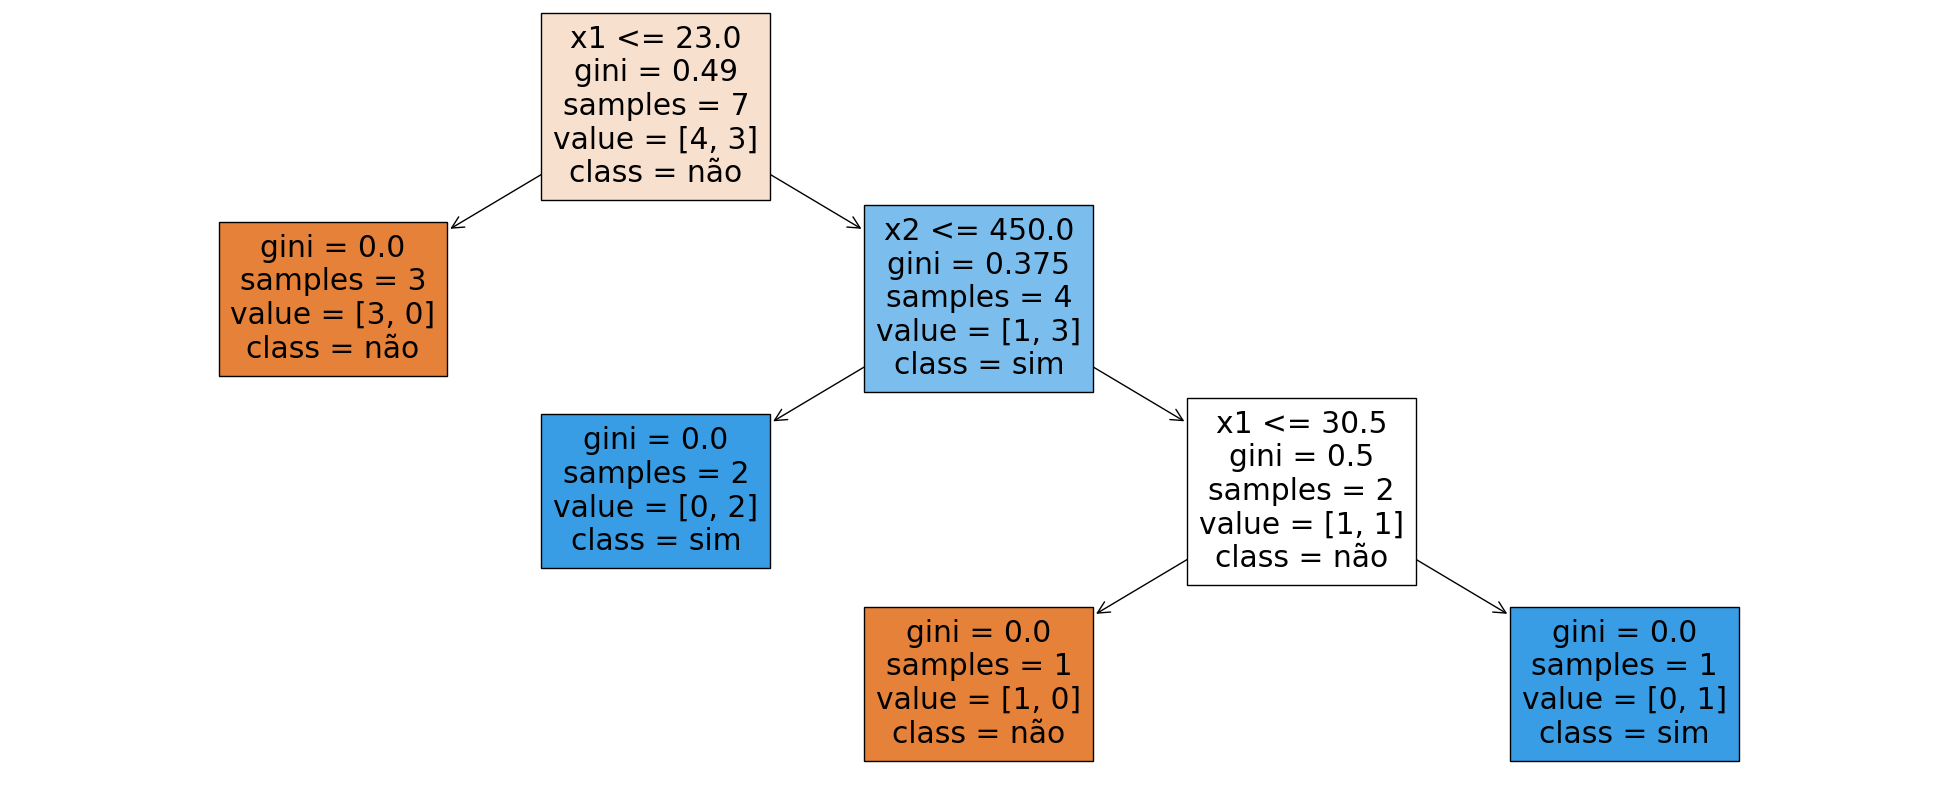

In [103]:
plt.figure(figsize=(25,10))
plot_tree(
    clf,
    filled=True,
    class_names=['não', 'sim'],
    feature_names=['x1', 'x2']
)

## 7 - Overfitting, treino e teste <a name='overfittingTT'><a/>

In [105]:
# Bibliotecas 
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [106]:
# Gerando a árvore de classificação
clf_df = DecisionTreeClassifier(random_state=100)
clf_df

DecisionTreeClassifier(random_state=100)

In [107]:
# Fazendo uso do banco de dados adquirido a partir do titanic_encoded 
# Em que x são os dados de treinamento e y a variável target

# Utilizando todo o "x"
clf_df = clf_df.fit(x, y)
clf_df

DecisionTreeClassifier(random_state=100)

Text(0.5, 1.0, 'Decision tree Titanic dataset')

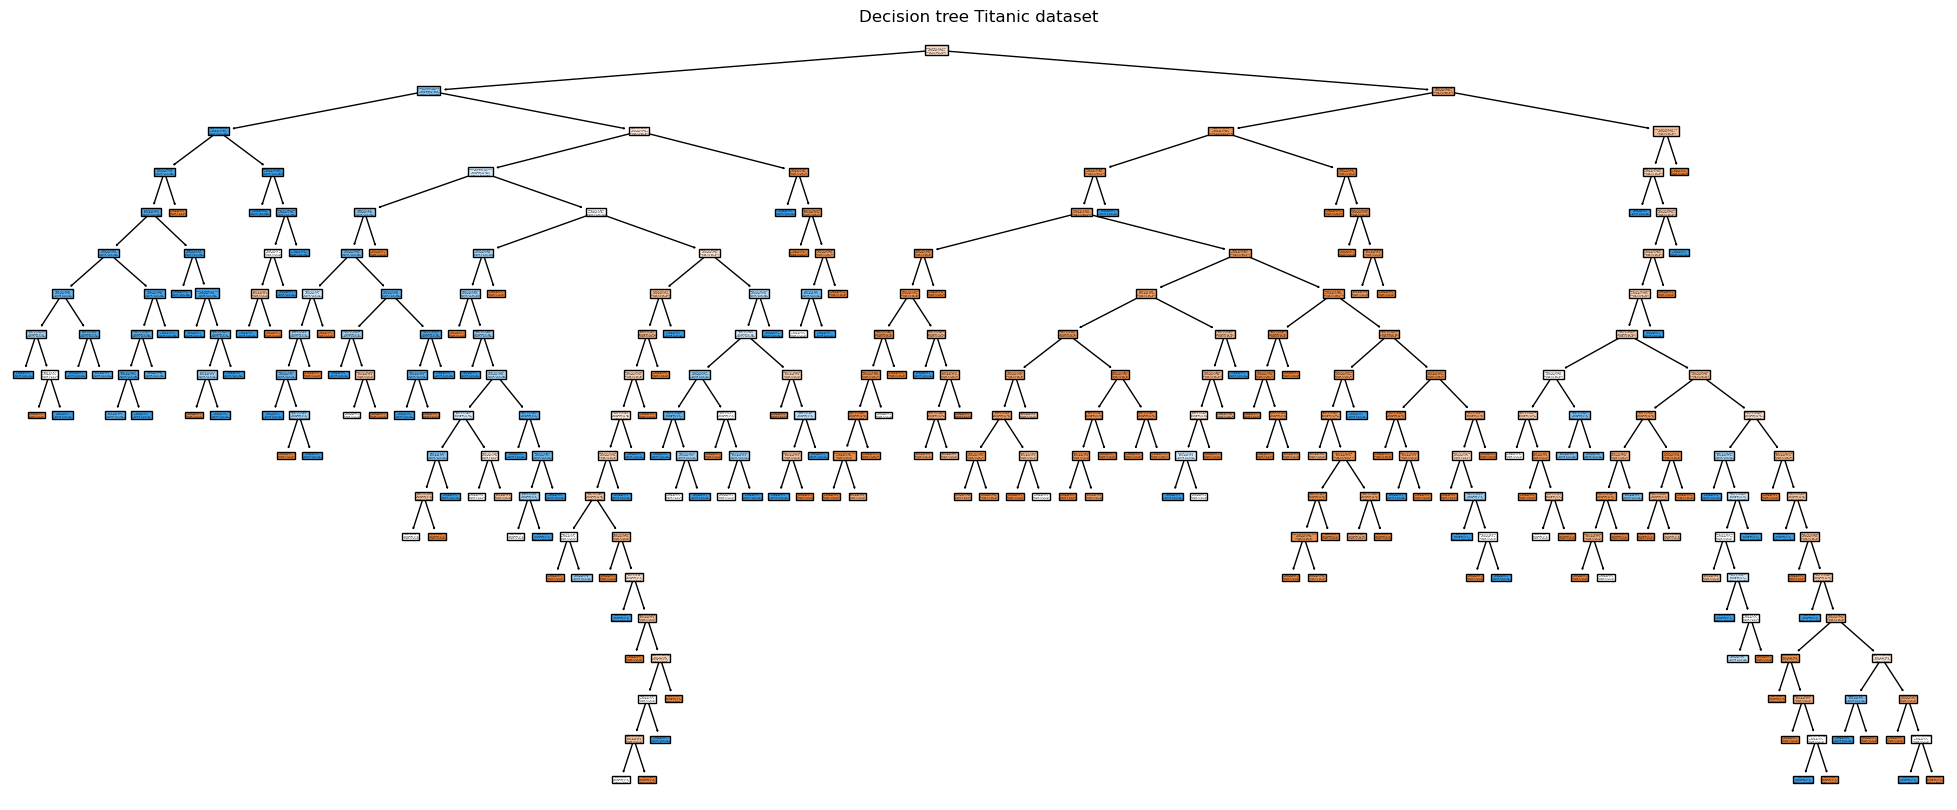

In [108]:
plt.figure(figsize=(25,10))
plot_tree(
    clf_df,
    filled=True,
    class_names=['Died','Survived'],
    feature_names=x.columns
)

plt.title('Decision tree Titanic dataset')

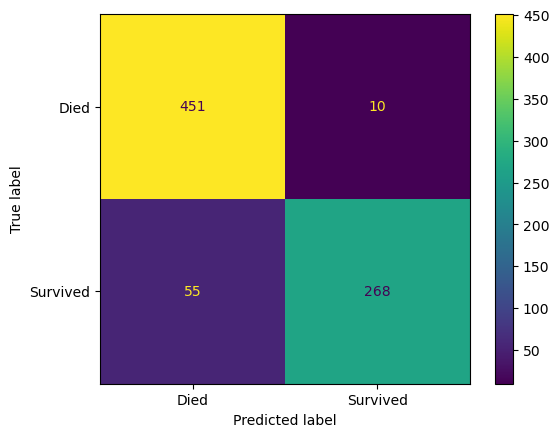

In [109]:
# Definindo a matriz de confusão

predictions = clf_df.predict(x)
cm = confusion_matrix(y, predictions, labels=clf_df.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot()

In [110]:
# Calculando a acurácia
predict = clf_df.predict(x)

accuracy_score(y, predict)

0.9170918367346939

### 7.1 - Separando entre treino e teste <a name='SepTrainTest'><a/>

In [112]:
# Separando o conteúdo de treino e teste

# Definindo as variáveis _test e _train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# test_size --> Dados reservados para teste

In [113]:
# Definindo a árvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

In [114]:
# Predizendo com base no conjunto de dados de teste
predict = clf.predict(x_test)
predict

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

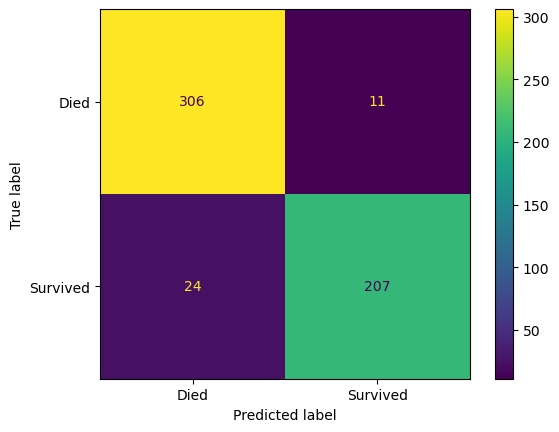

In [115]:
# Matriz de confusão para o treino
cm = confusion_matrix(y_train, clf.predict(x_train))
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot()

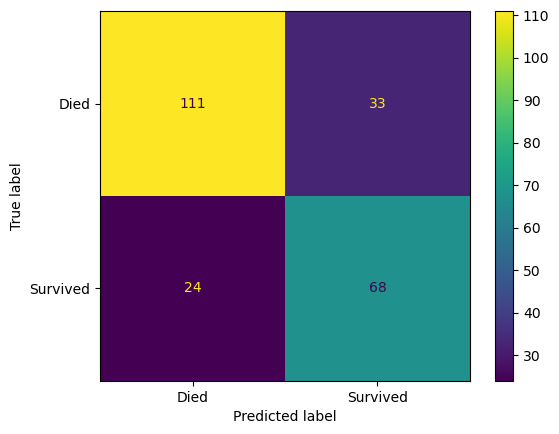

In [116]:
# Criando a Matriz de Confusão (Para o teste)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot()

##### Determinando a acurácia com base na matriz de teste

In [118]:
x_test.shape

(236, 10)

In [119]:
# Pode-se calcular desta forma:

acertos = 111 + 68
valor_total = 111 + 68 + 33 + 24

acuracia = acertos/valor_total
print('A acurácia é de: {}%'.format(round(acuracia*100, 2)))

A acurácia é de: 75.85%


In [120]:
# Ou utilizando os recursos do scikit-learn

accuracy_score(y_test, predict) * 100

75.84745762711864

## 8 - Poda da árvore I <a name='Poda1'><a/>

- Poda - Pre pruning

- Um dos métodos se baseia na limitação da profundidade da árvore, ou seja, limitando seu tamanho.
- Outra forma, seria a limitação do número de amostras mínimo por folha, nós finais.

### 8.1 - Limitando a profundidade <a name='LimitProf'><a/>

- Via parâmetro `max_depth`.

In [124]:
# Parâmetro max_depth
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf = clf.fit(x_train, y_train) # Definindo o fitting
predict = clf.predict(x_test) # Definindo a predição
accuracy_score(y_test, predict) # Definindo a acurácia

0.7923728813559322

Text(0.5, 1.0, 'Árvore com profundidade limitada')

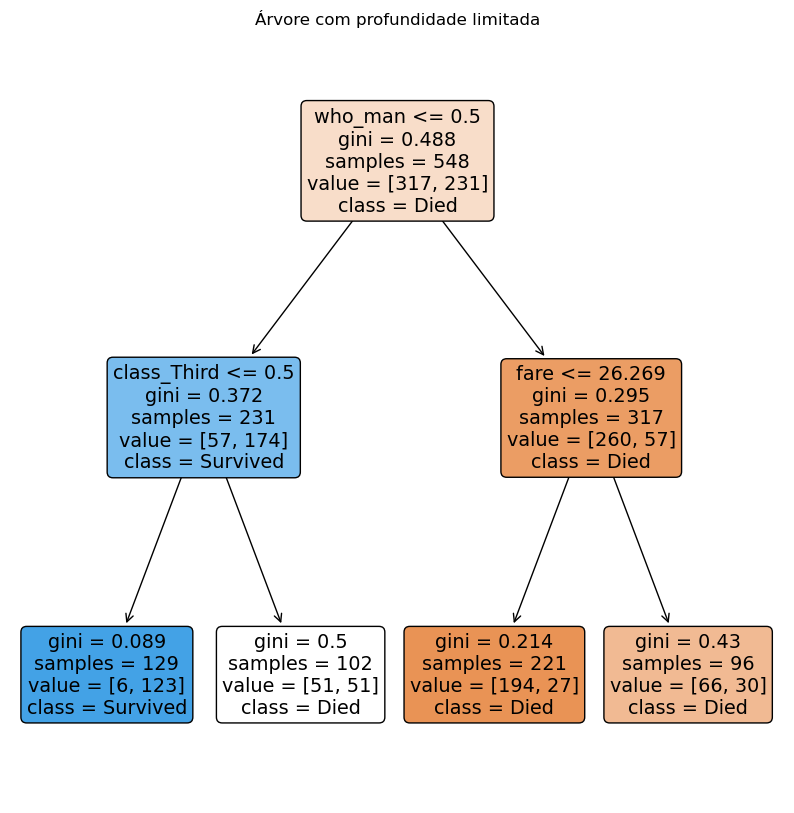

In [125]:
plt.figure(figsize=(10, 10))
plot_tree(
    clf,
    filled = True,
    rounded = True,
    class_names=['Died', 'Survived'],
    feature_names=x_train.columns
)
plt.title('Árvore com profundidade limitada')

In [126]:
# Limitando em uma profundidade maior
clf2 = DecisionTreeClassifier(max_depth=5, random_state=100)
clf2 = clf2.fit(x_train, y_train) # Definindo o fitting
predict = clf2.predict(x_test) # Definindo a predição
accuracy_score(y_test, predict) # Definindo a acurácia

0.7584745762711864

Text(0.5, 1.0, 'Árvore com profundidade "5"')

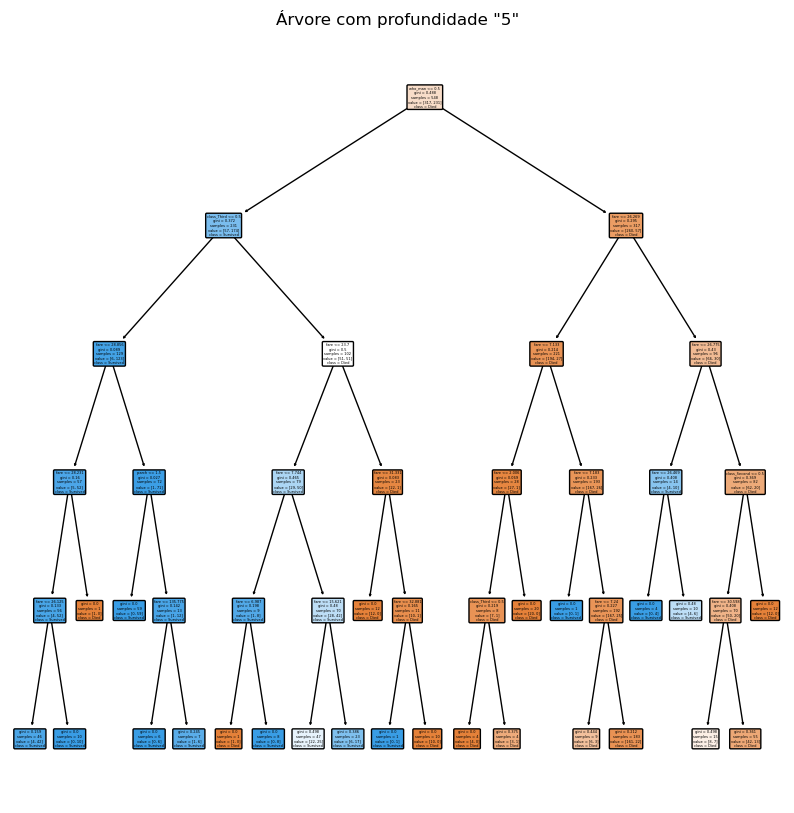

In [127]:
plt.figure(figsize=[10,10])
plot_tree(
    clf2,
    filled=True,
    rounded=True,
    class_names=['Died','Survived'],
    feature_names=x_train.columns
)
plt.title('Árvore com profundidade "5"')

### 8.2 - Limitando a quantidade de amostras na folha <a name='LimitFolha'><a/>

- Via parâmetro `min_samples_leaf`.

In [129]:
# Definindo a árvore
clf = DecisionTreeClassifier(min_samples_leaf=50, random_state=100)
# Treinando
clf = clf.fit(x_train, y_train)
# A predição 
prdict = clf.predict(x_test)
# A acurácia
accuracy_score(y_test, predict)

0.7584745762711864

Text(0.5, 1.0, 'Árvore com número de amostras na folha limitado')

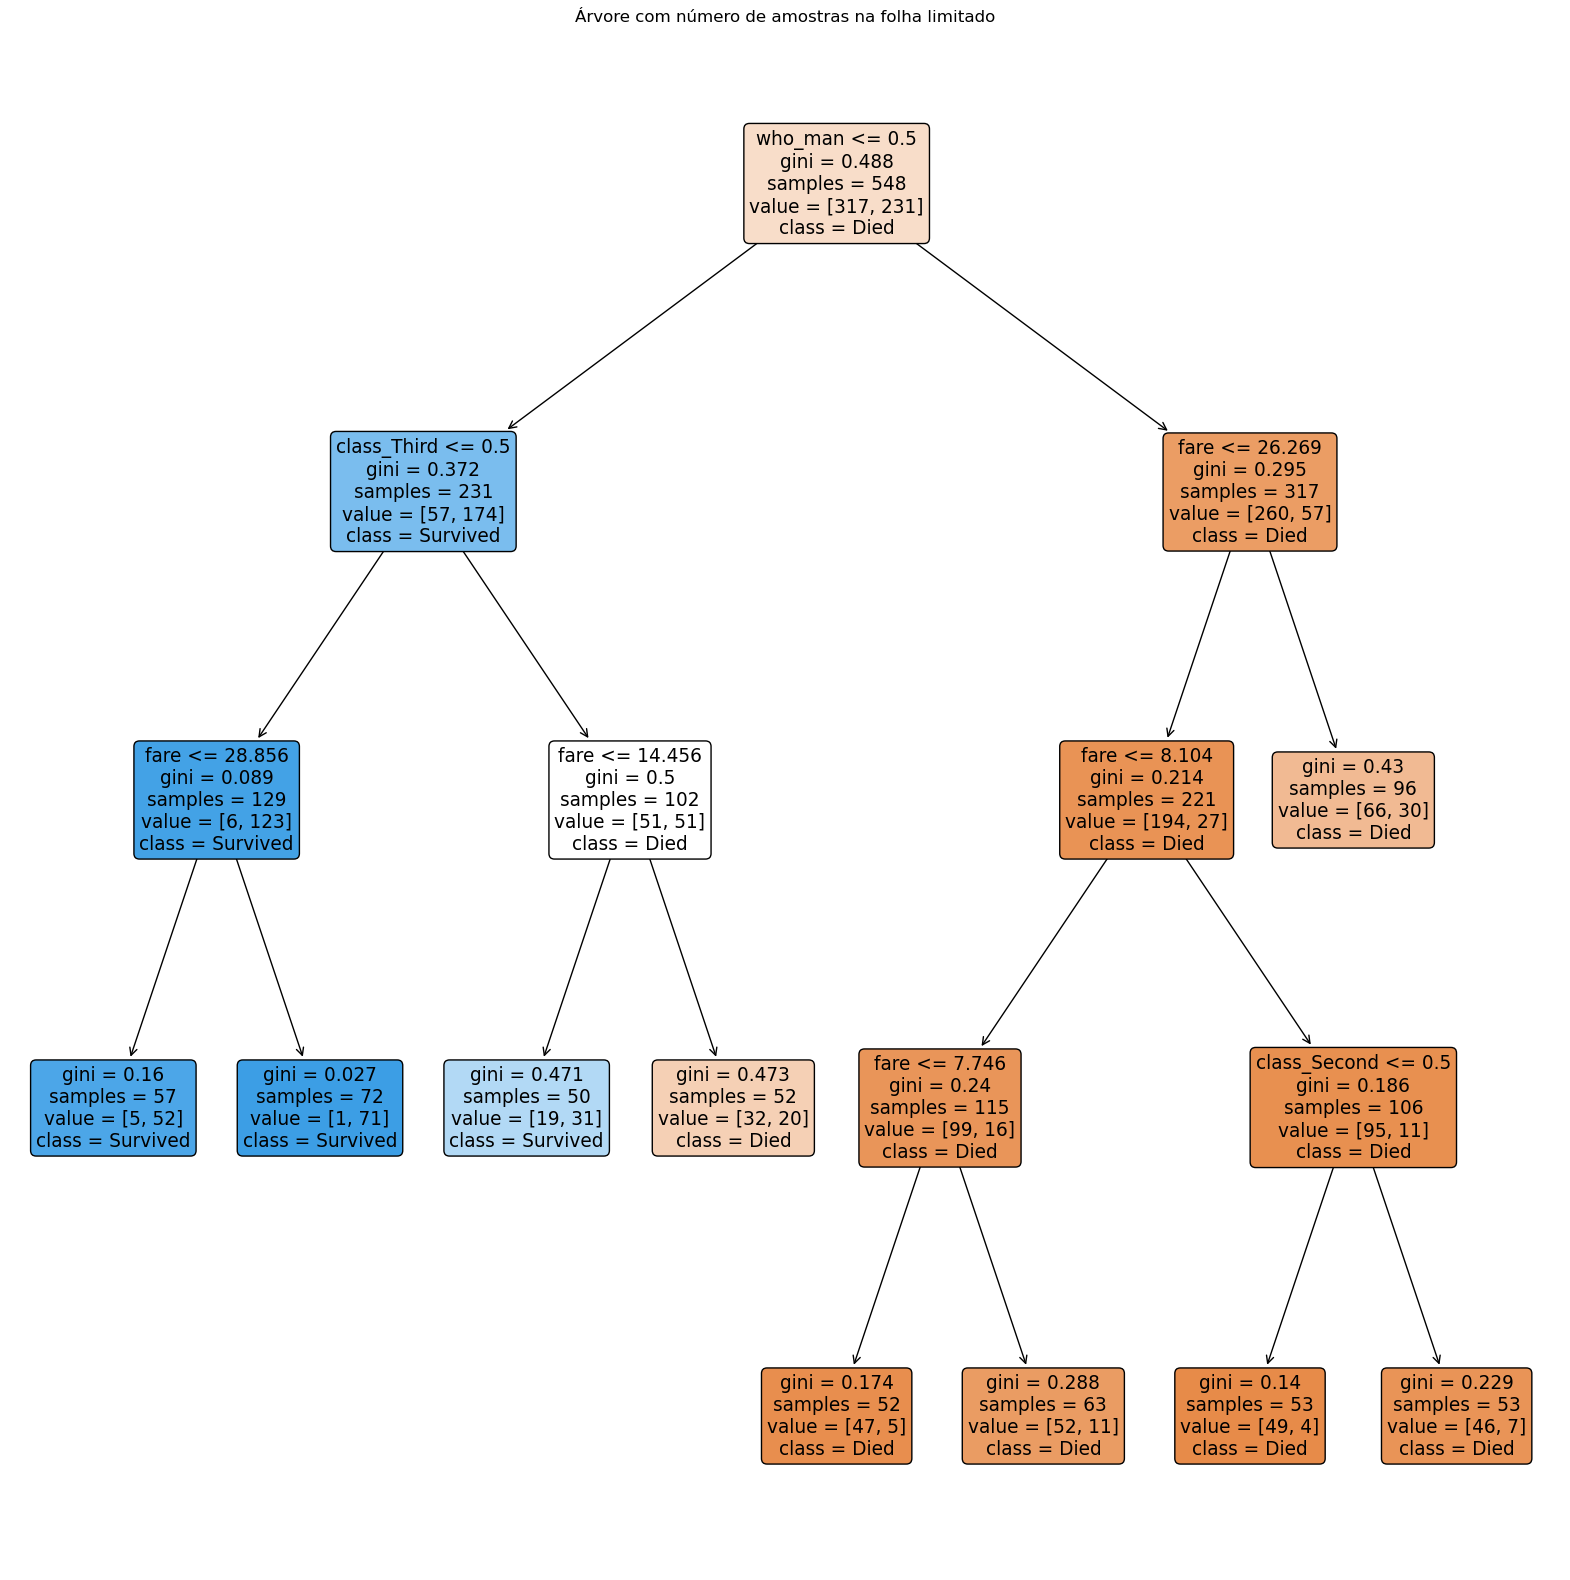

In [130]:
plt.figure(figsize=(20, 20))
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['Died', 'Survived'],
    feature_names=x_train.columns
)
plt.title('Árvore com número de amostras na folha limitado')

### 8.3 - Limitando a profundidade e a quantidade de amostras na folha <a name='LimitProfFolha'><a/>

In [132]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=80, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

Text(0.5, 1.0, 'Árvore limitada pela profundidade e o número de amostras na folha')

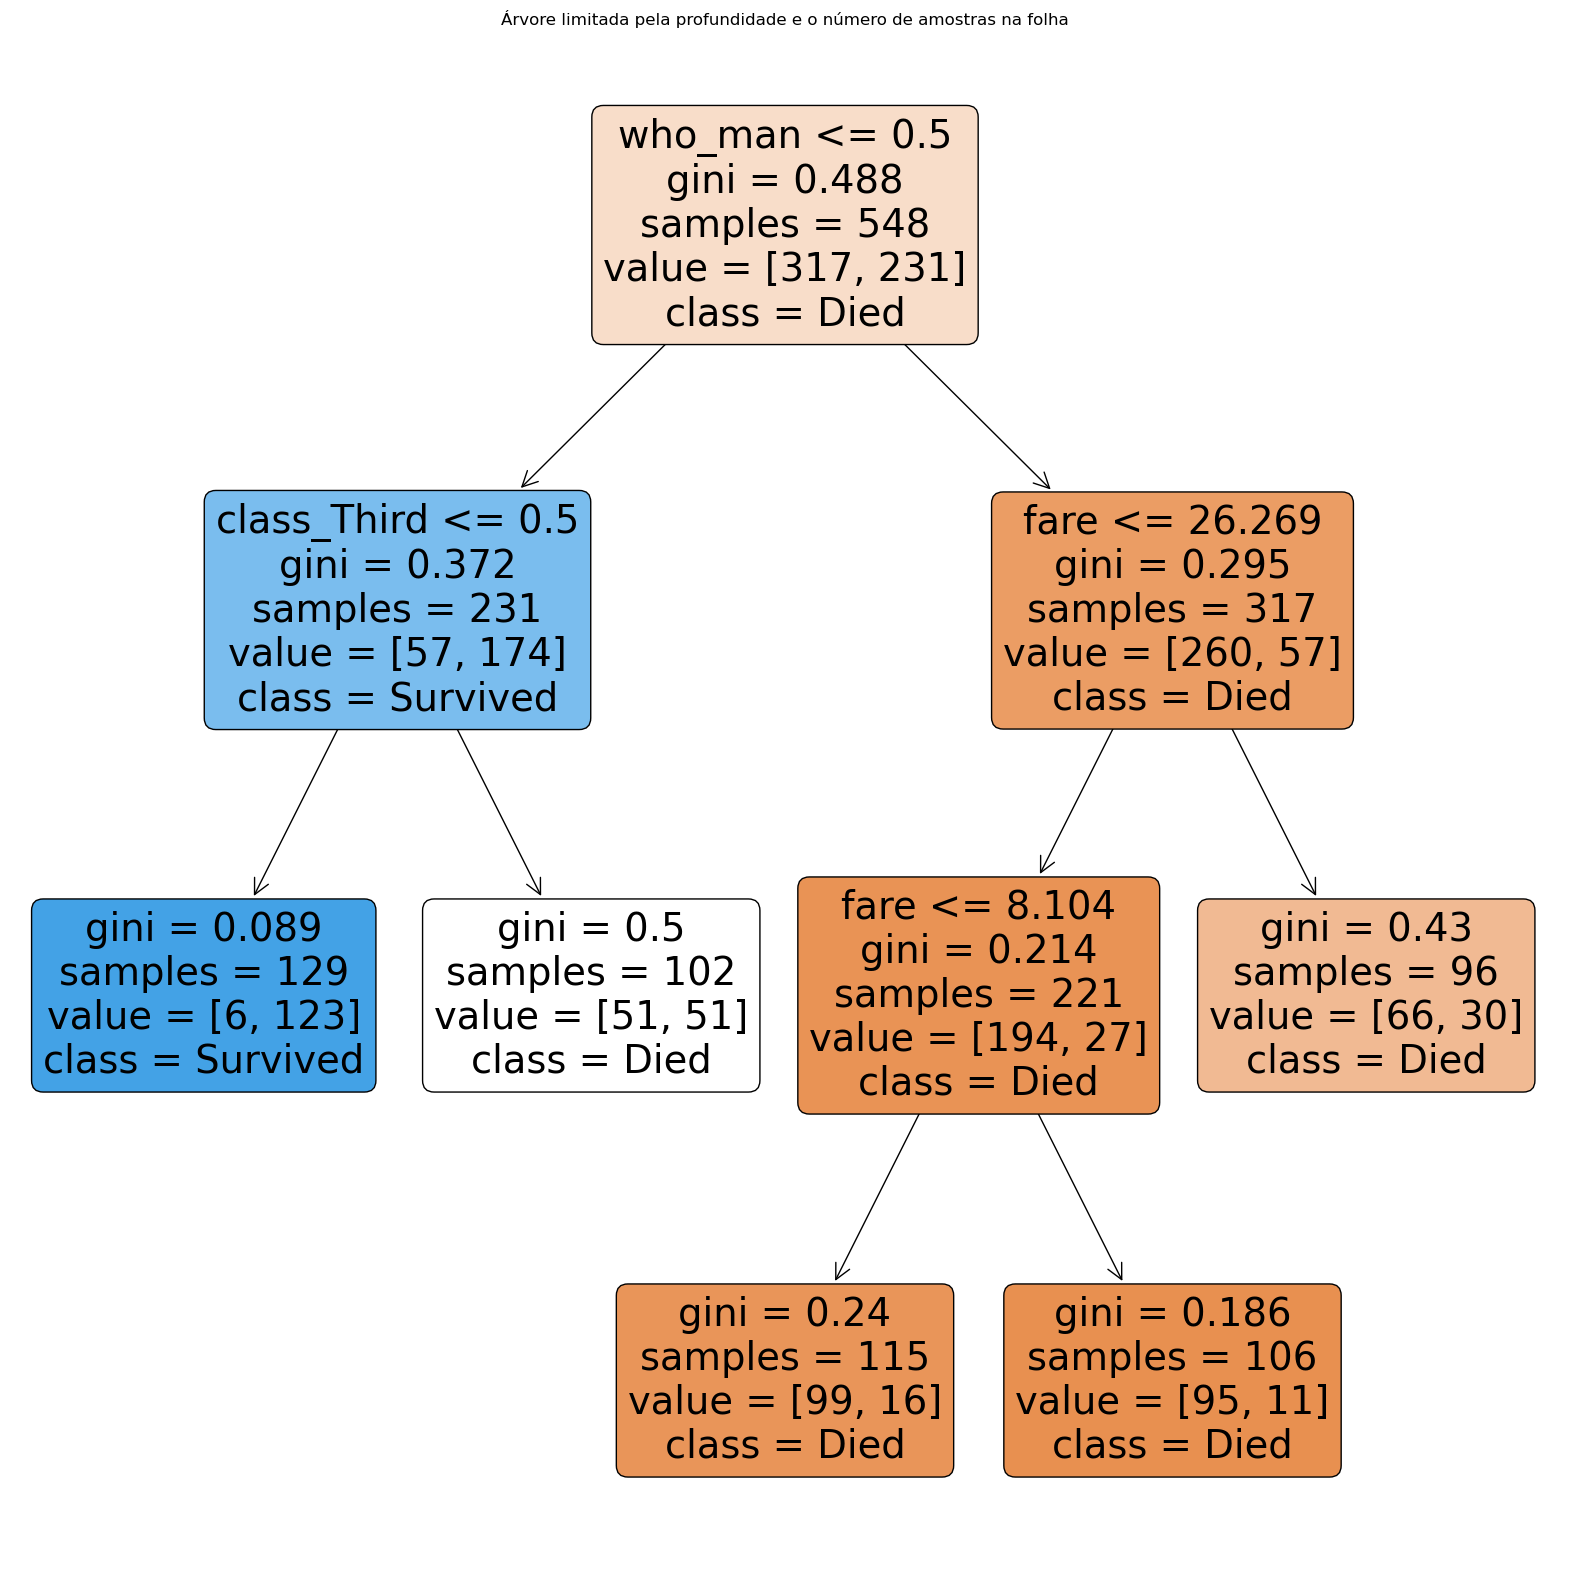

In [133]:
plt.figure(figsize=(20, 20))
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['Died', 'Survived'],
    feature_names=x_train.columns
)
plt.title('Árvore limitada pela profundidade e o número de amostras na folha')

**O ajuste do tamanho da árvore é uma forma de se evitar o `overfitting` do modelo.**

Text(0.5, 1.0, 'Árvore sem limitações e dados de teste ("raw")')

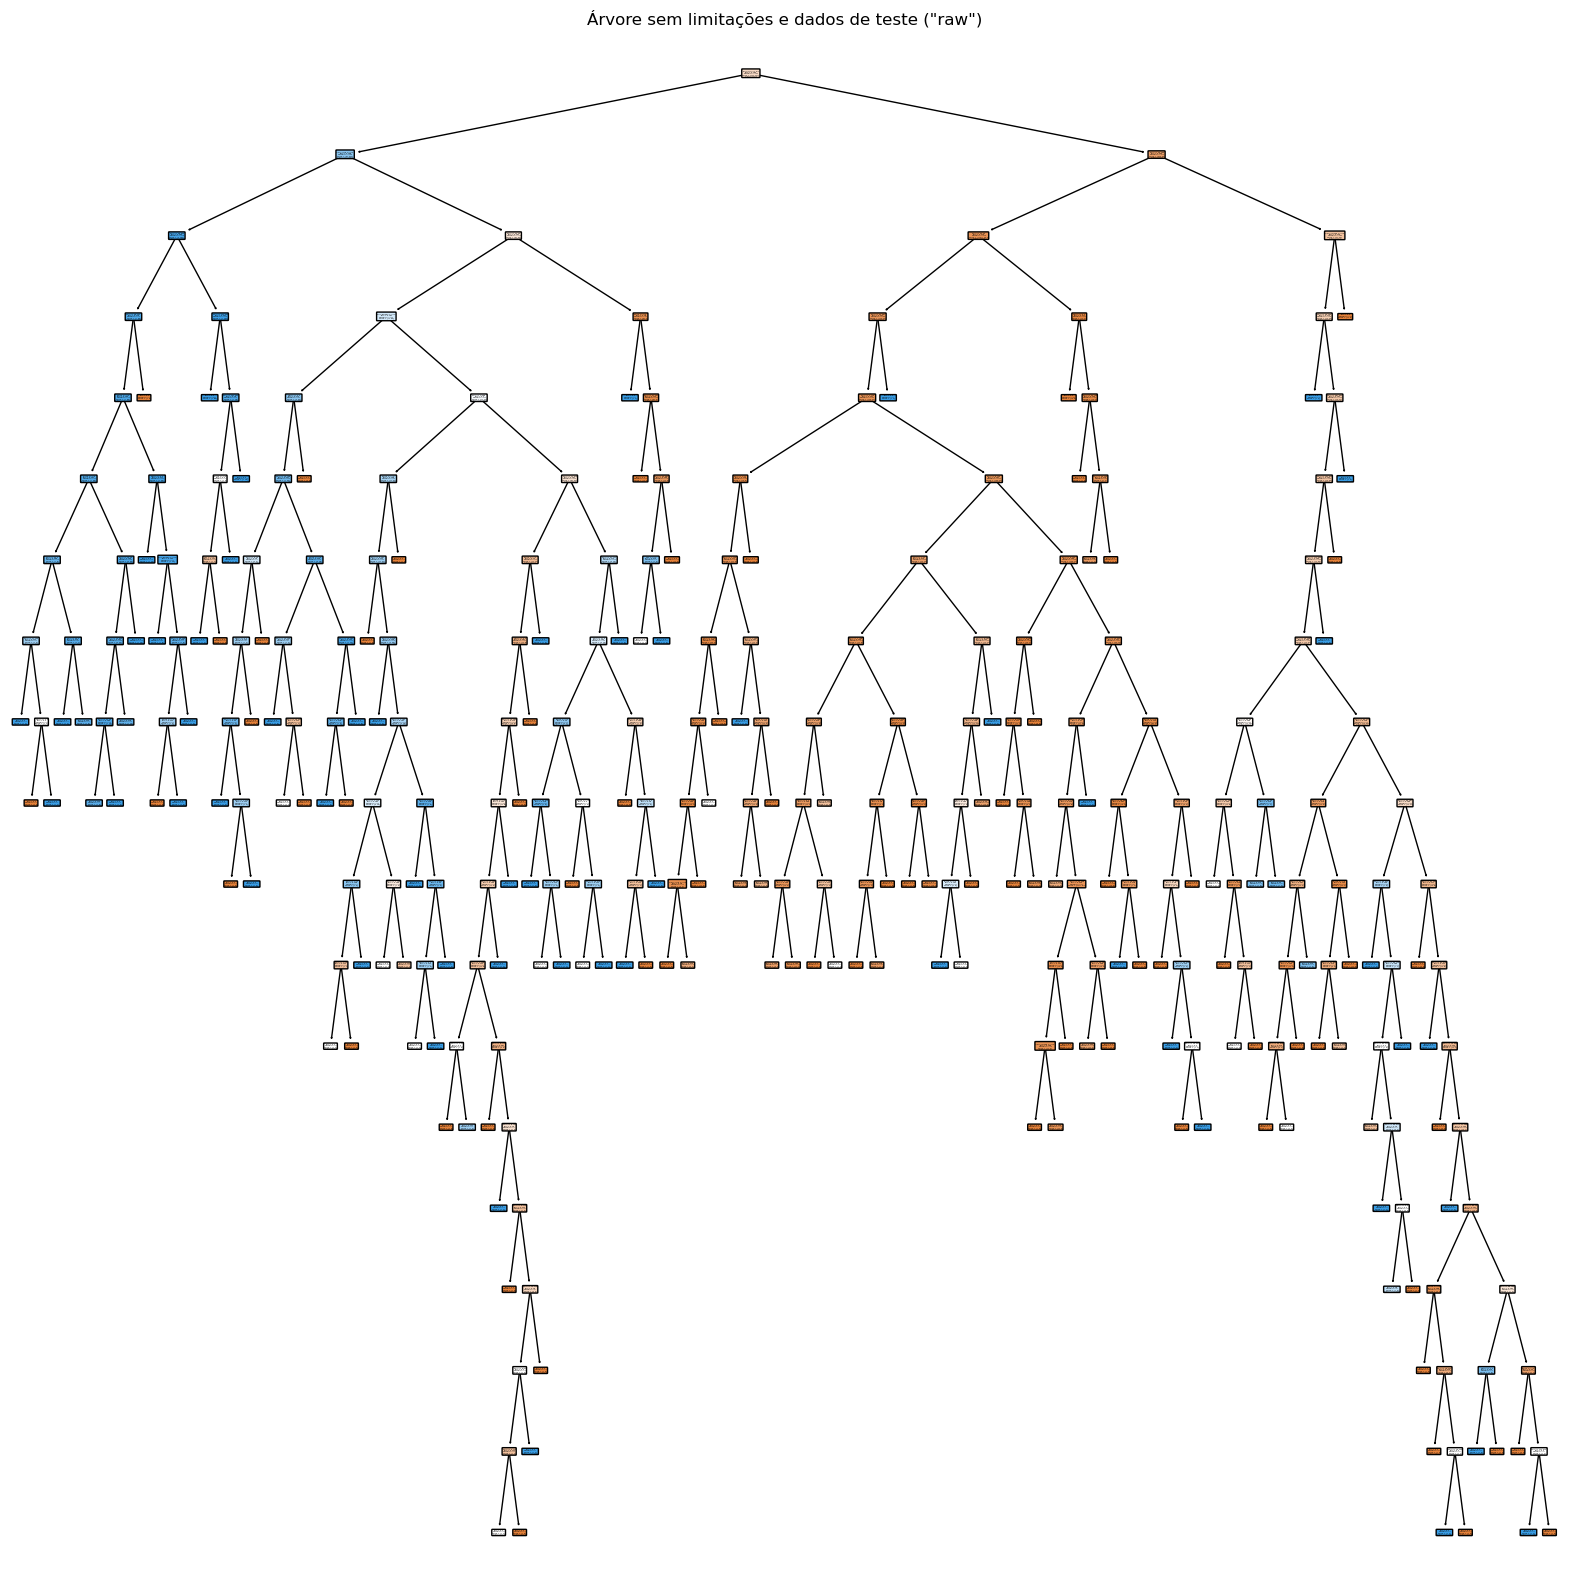

In [135]:
# Gerando a árvore sem ajuste de tamanho e organização de dados de teste 
# Valores do dataframe inicial (seção 7)

plt.figure(figsize=(20, 20))
plot_tree(
    clf_df,
    filled=True,
    rounded=True,
    class_names=['Died', 'Survived'],
    feature_names=x.columns
)
plt.title('Árvore sem limitações e dados de teste ("raw")')

## 9 - Poda da árvore II <a name='PodaII'><a/>

- [Post pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html) --> Corte após a árvore ter sido gerada e não no momento da criação.

- Controlando os valores de `ccp_alpha`
- `ccp_alpha` --> valores maiores aumentam o número de nós podados. 

In [137]:
# Bibliotecas
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [138]:
# Definindo árvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [139]:
# Obtendo os ccp_alphas
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, imputiries = path.ccp_alphas, path.impurities

In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

# clfs

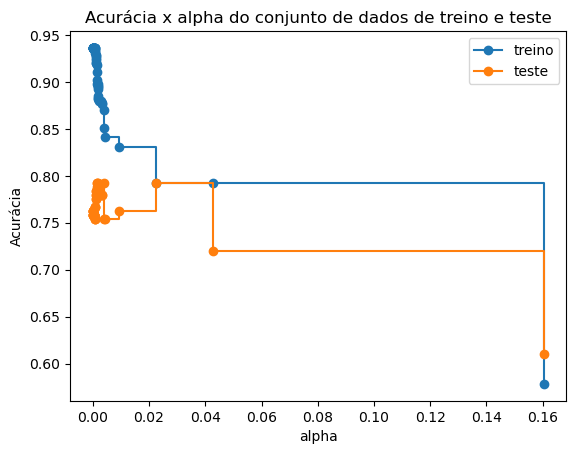

In [141]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='treino', 
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='teste',
        drawstyle='steps-post')
ax.legend()
plt.show()

**Quando maior o alpha menos complexa é a árvore e menos nós ela tem.**

In [143]:
# Para determinar qual o melhor ponto de corte
# pode-se analisar a tabela

pd.DataFrame({'alpha':ccp_alphas.tolist(), 'score': test_scores})

# .tolist() não é necessário

,alpha,score
0,0.000000,0.762712
1,0.000028,0.762712
2,0.000065,0.762712
3,0.000065,0.762712
4,0.000115,0.762712
5,0.000122,0.758475
6,0.000122,0.758475
7,0.000122,0.758475
8,0.000142,0.758475
9,0.000162,0.758475


Na linha 50 tem-se o que aparenta ser o melhor valor de alpha. O mesmo pode ser utilizado.

In [145]:
# Podando com base no valor de alpha
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.022588)

0.7923728813559322

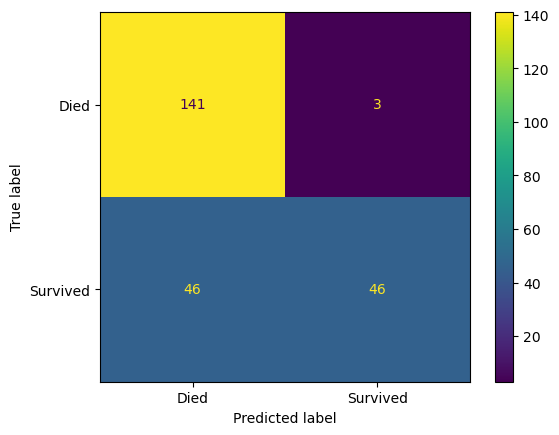

In [146]:
clf_podada.fit(x_train, y_train)
predict = clf_podada.predict(x_test)

# Matriz de confusão
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot()

# Acurácia
accuracy_score(y_test, predict)

In [147]:
pred = clf_podada.predict(x_test)
accuracy_score(y_test, pred)

0.7923728813559322

Text(0.5, 1.0, 'Árvore podada (Post pruning)')

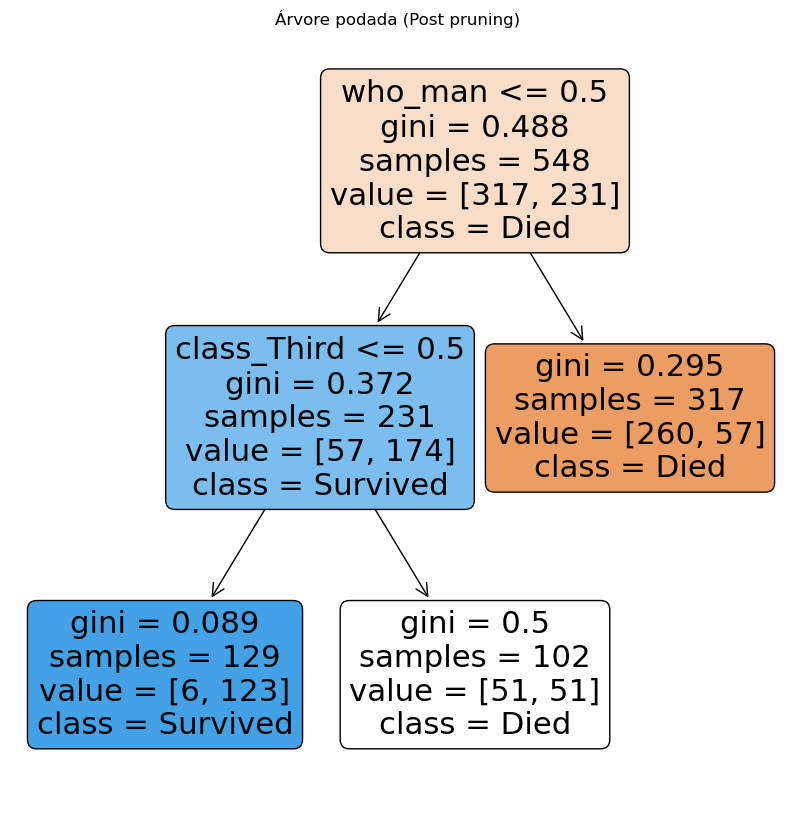

In [148]:
plt.figure(figsize=[10,10])
plot_tree(
    clf_podada,
    filled=True,
    rounded=True,
    class_names=['Died', 'Survived'],
    feature_names=x_train.columns
)

plt.title('Árvore podada (Post pruning)')

# Gerando uma árvore extremamente enxuta

Text(0.5, 1.0, 'Árvore inicial (sem modificações)')

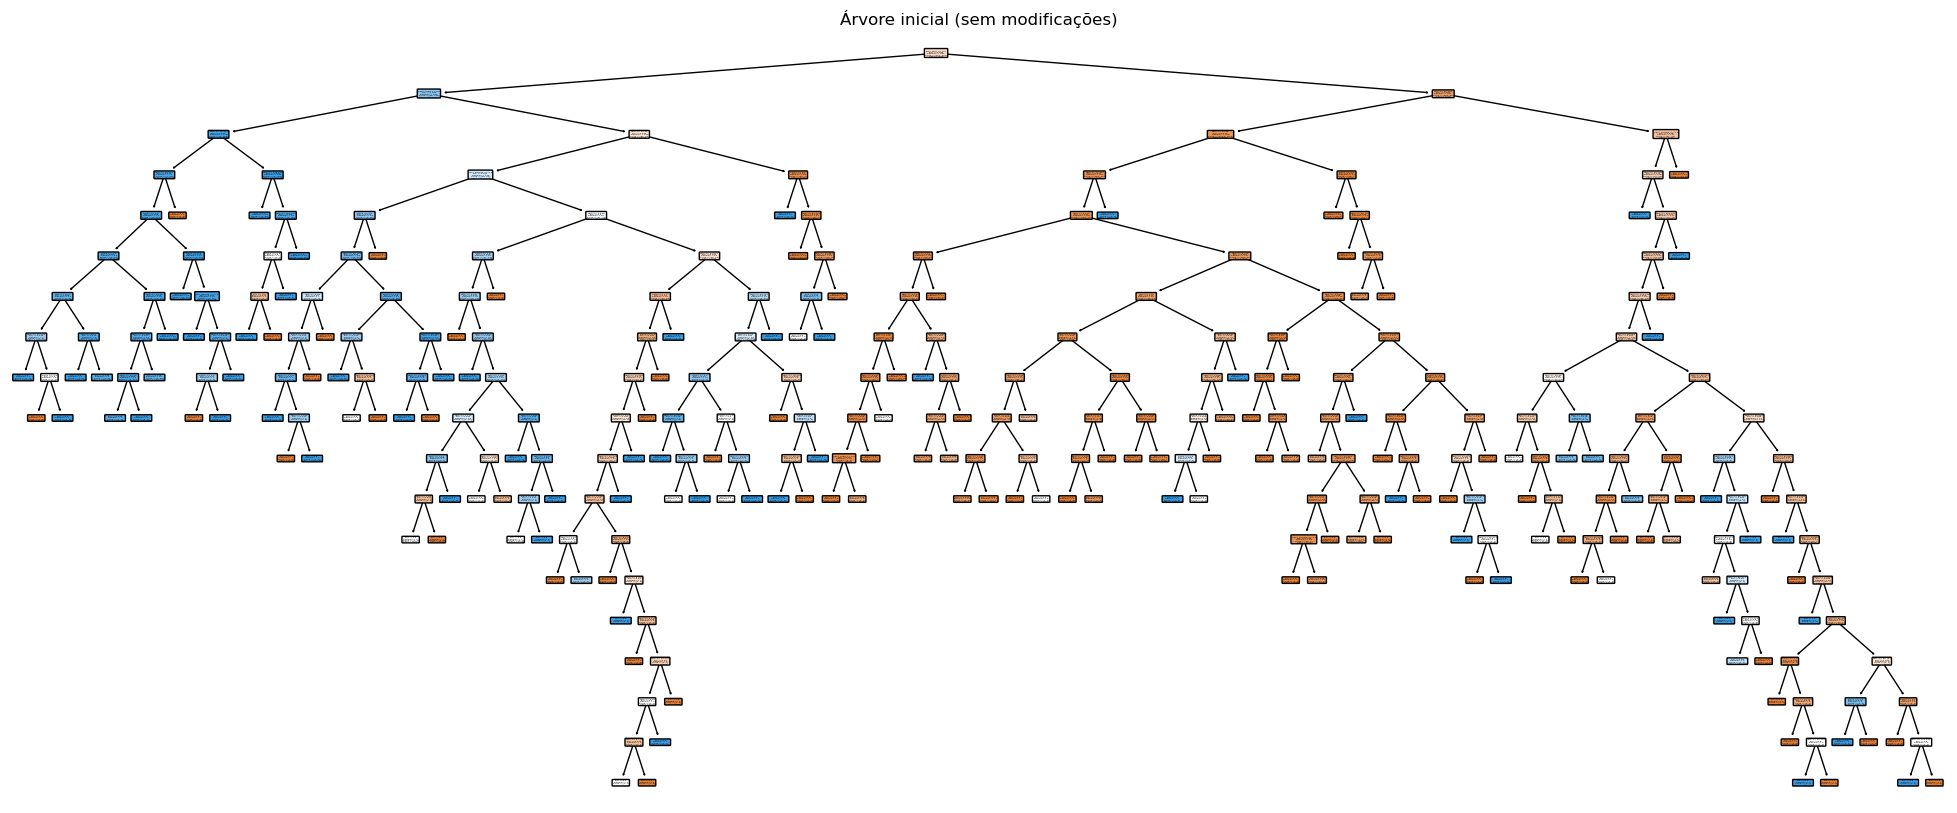

In [258]:
# Alvore geral, sem modificações
plt.figure(figsize=[25,10])
plot_tree(
    clf_df,
    filled=True,
    rounded=True,
    class_names=['Died', 'Survived'],
    feature_names=x.columns
)

plt.title('Árvore inicial (sem modificações)')